# Pylops - basic linear operators on GPU with cupy

In this notebook I will show how to use some of the basic linear operators implemented in *Pylops* and test both their numpy and cupy backends.

In [1]:
!nvidia-smi

Fri Oct 30 20:17:29 2020       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 455.32.00    Driver Version: 418.67       CUDA Version: 10.1     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15079MiB |      0%      Default |
|                               |                      |                 ERR! |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# install conda (https://towardsdatascience.com/conda-google-colab-75f7c867a522)
%env PYTHONPATH=

env: PYTHONPATH=


In [3]:
%%bash
MINICONDA_INSTALLER_SCRIPT=Miniconda3-4.5.4-Linux-x86_64.sh
MINICONDA_PREFIX=/usr/local
wget https://repo.continuum.io/miniconda/$MINICONDA_INSTALLER_SCRIPT
chmod +x $MINICONDA_INSTALLER_SCRIPT
./$MINICONDA_INSTALLER_SCRIPT -b -f -p $MINICONDA_PREFIX

PREFIX=/usr/local
installing: python-3.6.5-hc3d631a_2 ...
installing: ca-certificates-2018.03.07-0 ...
installing: conda-env-2.6.0-h36134e3_1 ...
installing: libgcc-ng-7.2.0-hdf63c60_3 ...
installing: libstdcxx-ng-7.2.0-hdf63c60_3 ...
installing: libffi-3.2.1-hd88cf55_4 ...
installing: ncurses-6.1-hf484d3e_0 ...
installing: openssl-1.0.2o-h20670df_0 ...
installing: tk-8.6.7-hc745277_3 ...
installing: xz-5.2.4-h14c3975_4 ...
installing: yaml-0.1.7-had09818_2 ...
installing: zlib-1.2.11-ha838bed_2 ...
installing: libedit-3.1.20170329-h6b74fdf_2 ...
installing: readline-7.0-ha6073c6_4 ...
installing: sqlite-3.23.1-he433501_0 ...
installing: asn1crypto-0.24.0-py36_0 ...
installing: certifi-2018.4.16-py36_0 ...
installing: chardet-3.0.4-py36h0f667ec_1 ...
installing: idna-2.6-py36h82fb2a8_1 ...
installing: pycosat-0.6.3-py36h0a5515d_0 ...
installing: pycparser-2.18-py36hf9f622e_1 ...
installing: pysocks-1.6.8-py36_0 ...
installing: ruamel_yaml-0.15.37-py36h14c3975_2 ...
installing: six-1.11

--2020-10-30 20:17:30--  https://repo.continuum.io/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.continuum.io (repo.continuum.io)... 104.18.200.79, 104.18.201.79, 2606:4700::6812:c94f, ...
Connecting to repo.continuum.io (repo.continuum.io)|104.18.200.79|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh [following]
--2020-10-30 20:17:30--  https://repo.anaconda.com/miniconda/Miniconda3-4.5.4-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8303, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 58468498 (56M) [application/x-sh]
Saving to: ‘Miniconda3-4.5.4-Linux-x86_64.sh’

     0K .......... .......... .......... .......... ..........  0% 54.9M 1s
    50K .......... .......... .......... .......... ..........  0%

In [4]:
%%bash
conda install --channel defaults conda python=3.6 --yes
conda update --channel defaults --all --yes

Solving environment: ...working... done

## Package Plan ##

  environment location: /usr/local

  added / updated specs: 
    - conda
    - python=3.6


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pycparser-2.20             |             py_2          94 KB
    pysocks-1.7.1              |           py36_0          30 KB
    libedit-3.1.20191231       |       h14c3975_1         121 KB
    ld_impl_linux-64-2.33.1    |       h53a641e_7         645 KB
    setuptools-50.3.0          |   py36hb0f4dca_1         891 KB
    conda-4.9.1                |   py36h06a4308_0         3.1 MB
    tqdm-4.50.2                |             py_0          55 KB
    sqlite-3.33.0              |       h62c20be_0         2.0 MB
    chardet-3.0.4              |        py36_1003         197 KB
    yaml-0.2.5                 |       h7b6447c_0          87 KB
    ca-certificates-2020.10.14 |                0   

pycparser-2.20       |   94 KB | ########## | 100% 
pysocks-1.7.1        |   30 KB | ########## | 100% 
libedit-3.1.20191231 |  121 KB | ########## | 100% 
ld_impl_linux-64-2.3 |  645 KB | ########## | 100% 
setuptools-50.3.0    |  891 KB | ########## | 100% 
conda-4.9.1          |  3.1 MB | ########## | 100% 
tqdm-4.50.2          |   55 KB | ########## | 100% 
sqlite-3.33.0        |  2.0 MB | ########## | 100% 
chardet-3.0.4        |  197 KB | ########## | 100% 
yaml-0.2.5           |   87 KB | ########## | 100% 
ca-certificates-2020 |  128 KB | ########## | 100% 
libstdcxx-ng-9.1.0   |  4.0 MB | ########## | 100% 
conda-package-handli |  967 KB | ########## | 100% 
pyopenssl-19.1.0     |   47 KB | ########## | 100% 
readline-8.0         |  428 KB | ########## | 100% 
urllib3-1.25.11      |   93 KB | ########## | 100% 
tk-8.6.10            |  3.2 MB | ########## | 100% 
libgcc-ng-9.1.0      |  8.1 MB | ########## | 100% 
certifi-2020.6.20    |  159 KB | ########## | 100% 
openssl-1.1.

In [5]:
import sys
_ = (sys.path.append("/usr/local/lib/python3.6/site-packages"))

In [6]:
!conda install -c rapidsai -c conda-forge cusignal cudatoolkit=10.1 --yes

Solving environment: - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - cudatoolkit=10.1
    - cusignal


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    boost-1.74.0               |   py36h79e6602_1         312 KB  conda-forge
    boost-cpp-1.74.0           |       h9359b55_0        16.4 MB  conda-forge
    bzip2-1.0.8                |       h516909a_3         398 KB  conda-forge
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9880bd3_2         151 KB  conda-forge
    cudatoolkit-10.1.243       |       h6bb024c_0       347.4 MB
    cudnn-7.6.5                |       cuda10.1_0       179.9 MB
    cupy-8.1.0                 |   py36h1175eb7_0        34.1 MB  conda-forge
    cusignal-0.16.0   

In [7]:
!pip install pyFFTW

     |████████████████████████████████| 2.6 MB 4.7 MB/s 


In [8]:
#!pip install cupy-cuda101
!pip3 install cupy-cuda101==8.0.0rc1 --upgrade
#!pip install pylops[advanced]
!pip3 install git+https://github.com/mrava87/pylops@cupy-ext

     |████████████████████████████████| 114.9 MB 5.5 kB/s 
  Cloning https://github.com/mrava87/pylops (to revision cupy-ext) to /tmp/pip-req-build-g09_u4in
  Created wheel for pylops: filename=pylops-1.10.1.dev94+gcb5bd66-py3-none-any.whl size=162127 sha256=05fd5655938b9de7f96913fa0e84132f55d53cb1c3e13ee6f0488799972d0e85
  Stored in directory: /tmp/pip-ephem-wheel-cache-87e6icah/wheels/92/3f/33/bb1bd7335dab4f72f8e54c5c935b290d143c80c09cb50b8b28
Successfully built pylops


In [9]:
!rm -rf /usr/local/lib/python3.6/dist-packages/cupy*

In [39]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import timeit
import os
import numpy as np
import cupy as cp
import scipy as sp
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy.sparse.linalg import inv, lsqr
from scipy.sparse import rand

from pylops.utils import dottest
from pylops import LinearOperator
from pylops.basicoperators import *
from pylops.optimization.solver import cgls
from pylops.optimization.leastsquares import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [40]:
cp.__version__

'8.0.0rc1'

In [41]:
def timing(cmd_setup, df, method):
  # _matvec
  mat_np = 'Op._matvec(x)'
  mat_cp = 'cOp._matvec(xc)'

  # _matvec
  rmat_np = 'Op._rmatvec(y)'
  rmat_cp = 'cOp._rmatvec(yc)'

  # dry run
  timeit.repeat(mat_cp, setup=cmd_setup, number=1, repeat=1)
  timeit.repeat(rmat_cp, setup=cmd_setup, number=1, repeat=1)

  # timing
  tm_ = 1.e3 * np.array(timeit.repeat(mat_np, setup=cmd_setup,
                                      number=10, repeat=5))
  trm_ = 1.e3 * np.array(timeit.repeat(rmat_np, setup=cmd_setup,
                                      number=10, repeat=5))
  for i in range(5):
    df.loc[len(df)] = [method, True, 'np', tm_[i]]
  for i in range(5):
    df.loc[len(df)] = [method, False, 'np', + trm_[i]]

  tm_ = 1.e3 * np.array(timeit.repeat(mat_cp, setup=cmd_setup,
                                      number=20, repeat=5))
  trm_ = 1.e3 * np.array(timeit.repeat(rmat_cp, setup=cmd_setup,
                                      number=20, repeat=5))
  for i in range(5):
    df.loc[len(df)] = [method, True, 'cp', tm_[i]]
  for i in range(5):
    df.loc[len(df)] = [method, False, 'cp', trm_[i]]
  return df

In [82]:
df = pd.DataFrame(columns=['Method', 'Forw', 'Backend', 'Time'])

## Diagonal

In [43]:
# setup command
cmd_setup ="""\
import numpy as np
import cupy as cp
import pylops
n = 250000
d = np.arange(n) + 1.
y = x = np.ones(n)
yc = xc = cp.ones(n)
Op = pylops.Diagonal(d)
cOp = pylops.Diagonal(cp.array(d))
"""

df = timing(cmd_setup, df, 'Diagonal')

## Matrix Multiplication

In [44]:
# setup command
cmd_setup ="""\
import numpy as np
import cupy as cp
import pylops
n = 500
D = np.ones((n, n))
y = x = np.ones(n)
yc = xc = cp.ones(n)
Op = pylops.MatrixMult(D)
cOp = pylops.MatrixMult(cp.array(D))
"""

df = timing(cmd_setup, df, 'MatrixMult')

## Identity

In [45]:
# setup command
cmd_setup ="""\
import numpy as np
import cupy as cp
import pylops
n = 250000
y = x = np.ones(n)
yc = xc = cp.ones(n)
Op = pylops.Identity(n)
cOp = pylops.Identity(n)
"""

df = timing(cmd_setup, df, 'Identity')

## Zero

In [46]:
# setup command
cmd_setup ="""\
import numpy as np
import cupy as cp
import pylops
ny, nx = 500, 500
y = x   = cp.arange(nx)
yc = xc = cp.ones(nx)
Op = pylops.Zero(ny, nx)
cOp = pylops.Zero(ny, nx)
"""

df = timing(cmd_setup, df, 'Zero')

## Sum

In [47]:
# setup command
cmd_setup ="""\
import numpy as np
import cupy as cp
import pylops
ny, nx = 500, 500
x = np.ones(nx*ny)
xc = cp.ones(nx*ny)
y = np.ones(nx)
yc = cp.ones(nx)
Op = pylops.Sum(dims=(ny, nx), dir=0)
cOp = pylops.Sum(dims=(ny, nx), dir=0)
"""
df = timing(cmd_setup, df, 'Sum')

## First Derivative

In [48]:
# setup command
cmd_setup ="""\
import numpy as np
import cupy as cp
import pylops
ny, nx = 500, 500
x = np.ones(nx*ny)
xc = cp.ones(nx*ny)
y = np.ones(nx*ny)
yc = cp.ones(nx*ny)
Op = pylops.FirstDerivative(ny*nx, (ny, nx), dir=0, edge=True)
cOp = pylops.FirstDerivative(ny*nx, (ny, nx), dir=0, edge=True)
"""
df = timing(cmd_setup, df, 'FirstDerivative')

## Second Derivative

In [49]:
# setup command
cmd_setup ="""\
import numpy as np
import cupy as cp
import pylops
ny, nx = 500, 500
x = np.ones(nx*ny)
xc = cp.ones(nx*ny)
y = np.ones(nx*ny)
yc = cp.ones(nx*ny)
Op = pylops.SecondDerivative(ny*nx, (ny, nx), dir=0, edge=True)
cOp = pylops.SecondDerivative(ny*nx, (ny, nx), dir=0, edge=True)
"""
df = timing(cmd_setup, df, 'SecondDerivative')

## Laplacian

In [50]:
# setup command
cmd_setup ="""\
import numpy as np
import cupy as cp
import pylops
ny, nx = 500, 500
x = np.ones(nx*ny)
xc = cp.ones(nx*ny)
y = np.ones(nx*ny)
yc = cp.ones(nx*ny)
Op = pylops.Laplacian((ny, nx), edge=True)
cOp = pylops.Laplacian((ny, nx), edge=True)
"""
df = timing(cmd_setup, df, 'Laplacian')

## Gradient

In [51]:
# setup command
cmd_setup ="""\
import numpy as np
import cupy as cp
import pylops
ny, nx = 500, 500
x = np.ones(nx*ny)
xc = cp.ones(nx*ny)
y = np.ones(nx*ny)
yc = cp.ones(nx*ny)
Op = pylops.Laplacian((ny, nx), edge=True)
cOp = pylops.Laplacian((ny, nx), edge=True)
"""
df = timing(cmd_setup, df, 'Gradient')

## Causal Integration

In [52]:
# setup command
cmd_setup ="""\
import numpy as np
import cupy as cp
import pylops
ny, nx = 500, 500
x = np.ones(nx*ny)
xc = cp.ones(nx*ny)
y = np.ones(nx*ny)
yc = cp.ones(nx*ny)
Op = pylops.CausalIntegration(ny*nx, (ny, nx), dir=1)
cOp = pylops.CausalIntegration(ny*nx, (ny, nx), dir=1)
"""
df = timing(cmd_setup, df, 'CausalIntegration')

## Flip

In [53]:
# setup command
cmd_setup ="""\
import numpy as np
import cupy as cp
import pylops
ny, nx = 500, 500
x = np.ones(nx*ny)
xc = cp.ones(nx*ny)
y = np.ones(nx*ny)
yc = cp.ones(nx*ny)
Op = pylops.Flip(ny*nx, (ny, nx), dir=1)
cOp = pylops.Flip(ny*nx, (ny, nx), dir=1)
"""
df = timing(cmd_setup, df, 'Flip')

## Pad

In [54]:
# setup command
cmd_setup ="""\
import numpy as np
import cupy as cp
import pylops
n = 250000
pad = (200, 200)
x = np.ones(n)
xc = cp.ones(n)
y = np.ones(n + 400)
yc = cp.ones(n + 400)
Op = pylops.Pad(n, pad)
cOp = pylops.Pad(n, pad)
"""
df = timing(cmd_setup, df, 'Pad')

## Pad

In [55]:
# setup command
cmd_setup ="""\
import numpy as np
import cupy as cp
import pylops
n = 250000
x = np.ones(n)
xc = cp.ones(n)
y = np.ones(n)
yc = cp.ones(n)
Op = pylops.Roll(n, shift=20)
cOp = pylops.Roll(n, shift=20)
"""
df = timing(cmd_setup, df, 'Roll')

## Symmetrize


In [56]:
# setup command
cmd_setup ="""\
import numpy as np
import cupy as cp
import pylops
n = 250000
x = np.ones(n)
xc = cp.ones(n)
y = np.ones(n*2-1)
yc = cp.ones(n*2-1)
Op = pylops.Symmetrize(n)
cOp = pylops.Symmetrize(n)
"""
df = timing(cmd_setup, df, 'Symmetrize')

## Restriction

In [57]:
# setup command
cmd_setup ="""\
import numpy as np
import cupy as cp
import pylops
n = 250000
iava = np.arange(0,n,100)
x = np.ones(n)
xc = cp.ones(n)
y = np.ones(n//100)
yc = cp.ones(n//100)
Op = pylops.Restriction(n, iava)
cOp = pylops.Restriction(n, iava)
"""
df = timing(cmd_setup, df, 'Restriction')

## Transpose

In [58]:
# setup command
cmd_setup ="""\
import numpy as np
import cupy as cp
import pylops
ny, nx = 500, 500
x = np.ones(nx*ny)
xc = cp.ones(nx*ny)
y = np.ones(nx*ny)
yc = cp.ones(nx*ny)
Op = pylops.Transpose((ny, nx), axes=(1,0))
cOp = pylops.Transpose((ny, nx), axes=(1,0))
"""
df = timing(cmd_setup, df, 'Transpose')

## FFT

In [74]:
# setup command
cmd_setup ="""\
import numpy as np
import cupy as cp
import pylops
n = 250000
x = np.ones(n)
xc = cp.ones(n)
y = np.ones(n*2-1)
yc = cp.ones(n*2-1)
Op = pylops.signalprocessing.FFT(dims=[n], nfft=n)
cOp = pylops.signalprocessing.FFT(dims=[n], nfft=n)
"""
df = timing(cmd_setup, df, 'FFT')

## FFT2D

In [75]:
# setup command
cmd_setup ="""\
import numpy as np
import cupy as cp
import pylops
ny, nx = 500, 500
x = np.ones(nx*ny)
xc = cp.ones(nx*ny)
y = np.ones(nx*ny)
yc = cp.ones(nx*ny)
Op = pylops.signalprocessing.FFT2D(dims=[ny, nx])
cOp = pylops.signalprocessing.FFT2D(dims=[ny, nx])
"""
df = timing(cmd_setup, df, 'FFT2D')

## FFTND

In [83]:
# setup command
cmd_setup ="""\
import numpy as np
import cupy as cp
import pylops
nz, ny, nx = 50, 100, 100
x = np.ones(nz*nx*ny)
xc = cp.ones(nz*nx*ny)
y = np.ones(nz*nx*ny)
yc = cp.ones(nz*nx*ny)
Op = pylops.signalprocessing.FFTND(dims=[nz, ny, nx])
cOp = pylops.signalprocessing.FFTND(dims=[nz, ny, nx])
"""
df = timing(cmd_setup, df, 'FFTND')

## Convolve 1D

In [84]:
# setup command
cmd_setup ="""\
import numpy as np
import cupy as cp
import pylops
n = 250000
x = np.ones(n)
xc = cp.ones(n)
y = np.ones(n)
yc = cp.ones(n)
h = np.ones(40)
hc = cp.ones(40)
Op = pylops.signalprocessing.Convolve1D(n, h)
cOp = pylops.signalprocessing.Convolve1D(n, h)
"""
df = timing(cmd_setup, df, 'Convolve1D')

## ChirpRadon2D

In [85]:
# setup command
cmd_setup ="""\
import numpy as np
import cupy as cp
import pylops
nt, nh = 500, 500
t = np.arange(nt)
h = np.arange(nh)
x = np.ones(nt*nh)
xc = cp.ones(nt*nh)
y = np.ones(nt*nh)
yc = cp.ones(nt*nh)
Op = pylops.signalprocessing.ChirpRadon2D(t, h, 0.001)
cOp = pylops.signalprocessing.ChirpRadon2D(t, h, 0.001)

"""
df = timing(cmd_setup, df, 'ChirpRadon2D')

In [86]:
# setup command
cmd_setup ="""\
import numpy as np
import cupy as cp
import pylops
nt, nh1, nh2 = 100, 50, 50
t = np.arange(nt)
h1 = np.arange(nh1)
h2 = np.arange(nh2)
x = np.ones(nt*nh1*nh2)
xc = cp.ones(nt*nh1*nh2)
y = np.ones(nt*nh1*nh2)
yc = cp.ones(nt*nh1*nh2)
Op = pylops.signalprocessing.ChirpRadon3D(t, h1, h2, (0.001, 0.001), engine='fftw')
cOp = pylops.signalprocessing.ChirpRadon3D(t, h1, h2, (0.001, 0.001))

"""
df = timing(cmd_setup, df, 'ChirpRadon3D')

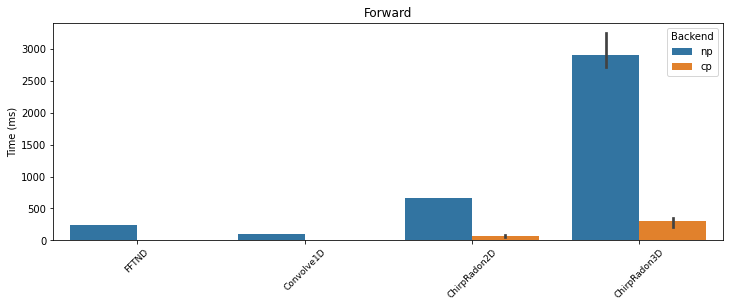

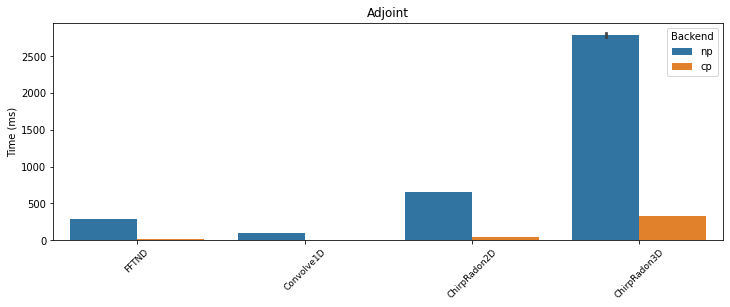

In [87]:
fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(x='Method', y='Time', hue='Backend', data=df[df['Forw']==True])
ax.set_xlabel('');
ax.set_ylabel('Time (ms)')
ax.set_title('Forward')
ax.set_xticklabels(df['Method'].unique(),rotation=45, fontsize=9)

fig, ax = plt.subplots(figsize=(12, 4))
sns.barplot(x='Method', y='Time', hue='Backend', data=df[df['Forw']==False])
ax.set_xlabel('');
ax.set_ylabel('Time (ms)')
ax.set_title('Adjoint')
ax.set_xticklabels(df['Method'].unique(),rotation=45, fontsize=9);

In [89]:
import numpy as np
import cupy as cp
import pylops
n = 250000
pad = (200, 200)
x = np.ones(n)
xc = cp.ones(n)
y = np.ones(n + 400)
yc = cp.ones(n + 400)
Op = pylops.Pad(n, pad)
cOp = pylops.Pad(n, pad)

%timeit -n10 -r2 Op._matvec(x)
%timeit -n10 -r2 cOp._matvec(xc)

10 loops, best of 2: 627 µs per loop
10 loops, best of 2: 79.2 µs per loop


In [90]:
from pylops.utils.backend import get_module


def _power_iteration(Op, niter=10, tol=1e-5,
                     dtype='float32', backend='numpy'):
    """Power iteration algorithm.
    Power iteration algorithm, used to compute the largest eigenvalue and
    corresponding eigenvector. This implementation closely follow that of
    https://en.wikipedia.org/wiki/Power_iteration.
    
    Parameters
    ----------
    Op : :obj:`pylops.LinearOperator`
        Operator
    niter : :obj:`int`, optional
        Number of iterations
    tol : :obj:`float`, optional
        Update tolerance
    dtype : :obj:`torch.dtype`, optional
        Type of elements in input array.
    backend : :obj:`str`, optional
        Backend to use ('numpy' or 'cupy')
    
    Returns
    -------
    maxeig : :obj:`int`
        Largest eigenvalue
    iiter : :obj:`int`
        Effective number of iterations
    """
    ncp = get_module(backend)
    
    # Choose a random vector to decrease the chance that vector
    # is orthogonal to the eigenvector
    b_k = ncp.random.randn(Op.shape[1]).astype(dtype)
    b_k_norm = ncp.linalg.norm(b_k)
        
    maxeig_old = 0.
    for iiter in range(niter):
        # compute largest eigenvector
        b_k = Op.matvec(b_k)
        
        # compute largest eigevalue
        b_k_norm = ncp.linalg.norm(b_k)
        maxeig = np.dot(b_k, b_k) / b_k_norm
        
        # re normalize the vector
        b_k /= b_k_norm
        
        if ncp.abs(maxeig - maxeig_old) < tol * maxeig_old:
            break
        maxeig_old = maxeig
    return maxeig, iiter + 1

In [95]:
np.random.seed(1)

A = np.random.randn(100, 100).astype(np.float32)
A = A.T @ A
Aop = MatrixMult(A)

eig = _power_iteration(Aop, niter=100, tol=0)
eig

(382.448, 100)

In [96]:
Acop = MatrixMult(cp.array(A))
eig = _power_iteration(Aop, niter=100, tol=0)
eig

(382.6105, 100)